# pandas - data analysis

understanding the data which means simply
1. null, missing, duplicates, wrong and types (numeric & categorical),
2. outliers,
3. relations,

- relations        -> statistical tests
```
                        categorical         |  continuous
         categorical    chi-square          |  T-test or ANOVA
         continuous     logistic-regression |  correlation
```
- bias vs variance -> in data (histogram, `skewness = Δ(median, mean)`)
                      in model (under-fit, over-fit)
- outliers         -> skewness = `Δ(median, mean)`
                      `(μ ± 3 * σ)`, if normally distributed
                      histogram

                      Inter quartile method => `percentiles ± 1.5 * [IQR=q3-q1]`,
                      anomaly detection
- types            -> `df.info()`  critical for statistical tests!
- null             -> `.isna().sum`
- category         -> `.describe(include='all')`
- wrong data       ->
- imbalanced       -> df.y.value_counts() (only in classification problem)
- statistics       -> .describe(include="all)
- scatter matrix   -> pd.plotting.scatter_matrix(df)
- heatmap          -> sns.heatmap(df.corr())
- correlations     -> df.corr()



In [318]:
import pandas as pd
import seaborn as sns

abaloneFile = "./dataset/abalone.parquet"

In [319]:
# read from parquet
# check data
# check types

dfAbalone = pd.read_parquet(path=abaloneFile)

print(dfAbalone.head(3).transpose())

                     0       1        2
length          0.4350  0.5850   0.6550
diameter        0.3350  0.4500   0.5100
height          0.1100  0.1250   0.1600
whole_weight    0.3340  0.8740   1.0920
shucked_weight  0.1355  0.3545   0.3960
viscera_weight  0.0775  0.2075   0.2825
shell_weight    0.0965  0.2250   0.3700
age             7.0000  6.0000  14.0000


In [333]:
# null check
# types check
# We may think that, age is categorical future.
#   then we can't use correlation b/w  age vs any continuous column !
#   and, imbalanced data check has to be done !

dfAbaloneCategorized = dfAbalone.astype({"age": "category"},
                                         copy=True)


dfAbalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          3320 non-null   float64
 1   diameter        3320 non-null   float64
 2   height          3320 non-null   float64
 3   whole_weight    3320 non-null   float64
 4   shucked_weight  3320 non-null   float64
 5   viscera_weight  3320 non-null   float64
 6   shell_weight    3320 non-null   float64
 7   age             3320 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 207.6 KB


In [335]:
#null check and counts if available

print(dfAbalone.isna().sum())

length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
age               0
dtype: int64


In [336]:
# Interpretation of descriptive statistics
# outliers -> check Δ(median, mean)
# skewness -> most of the histograms are negative skewed!
# median == 50% percentile !

dfAbaloneStats = dfAbalone.describe(include="all")

#add median calculation to same df!
# dfAbaloneStats.loc[len(dfStats.length)] = dfAbalone.median().transpose()
# dfAbaloneStats.rename(index= {8 : "median"}, inplace=True)

print(dfAbaloneStats)

            length     diameter       height  whole_weight  shucked_weight  \
count  3320.000000  3320.000000  3320.000000   3320.000000     3320.000000   
mean      0.522693     0.406575     0.139271      0.824734        0.357705   
std       0.121164     0.100120     0.042708      0.491182        0.222223   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.345000     0.115000      0.436375        0.181500   
50%       0.540000     0.425000     0.140000      0.795250        0.335500   
75%       0.615000     0.480000     0.165000      1.150000        0.504500   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight          age  
count     3320.000000   3320.000000  3320.000000  
mean         0.180162      0.237921     9.896988  
std          0.110182      0.140261     3.205654  
min          0.000500      0.001500     1.000000  
25%          0.092000      0.127375     8.

array([[<Axes: xlabel='length', ylabel='length'>,
        <Axes: xlabel='diameter', ylabel='length'>,
        <Axes: xlabel='height', ylabel='length'>,
        <Axes: xlabel='whole_weight', ylabel='length'>,
        <Axes: xlabel='shucked_weight', ylabel='length'>,
        <Axes: xlabel='viscera_weight', ylabel='length'>,
        <Axes: xlabel='shell_weight', ylabel='length'>,
        <Axes: xlabel='age', ylabel='length'>],
       [<Axes: xlabel='length', ylabel='diameter'>,
        <Axes: xlabel='diameter', ylabel='diameter'>,
        <Axes: xlabel='height', ylabel='diameter'>,
        <Axes: xlabel='whole_weight', ylabel='diameter'>,
        <Axes: xlabel='shucked_weight', ylabel='diameter'>,
        <Axes: xlabel='viscera_weight', ylabel='diameter'>,
        <Axes: xlabel='shell_weight', ylabel='diameter'>,
        <Axes: xlabel='age', ylabel='diameter'>],
       [<Axes: xlabel='length', ylabel='height'>,
        <Axes: xlabel='diameter', ylabel='height'>,
        <Axes: xlabel='hei

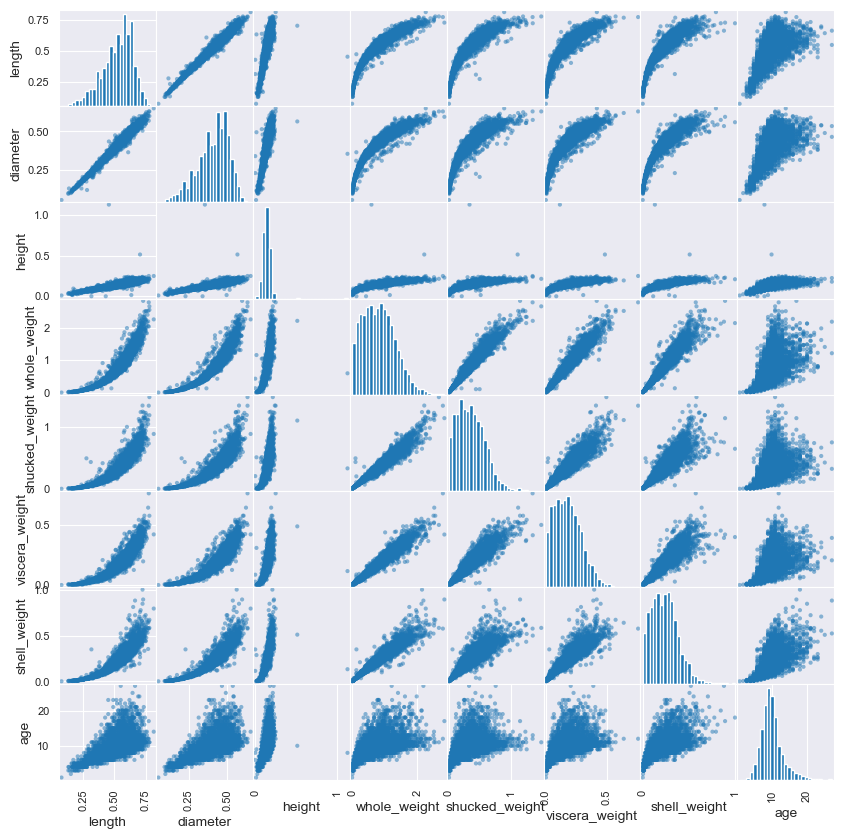

In [327]:
# imbalanced data check of age !
# check correlations


pd.plotting.scatter_matrix(dfAbalone, figsize=(10,10), hist_kwds={'bins':27})
# pd.plotting.scatter_matrix(dfAbaloneCategorized, figsize=(10,10), hist_kwds={'bins':27})


<Axes: >

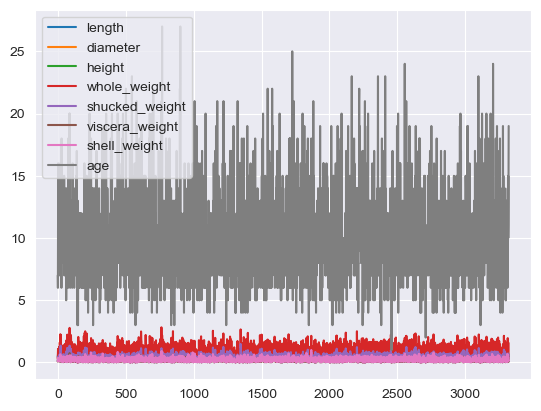

In [300]:
# peaks on age

dfAbalone.plot()

<Axes: >

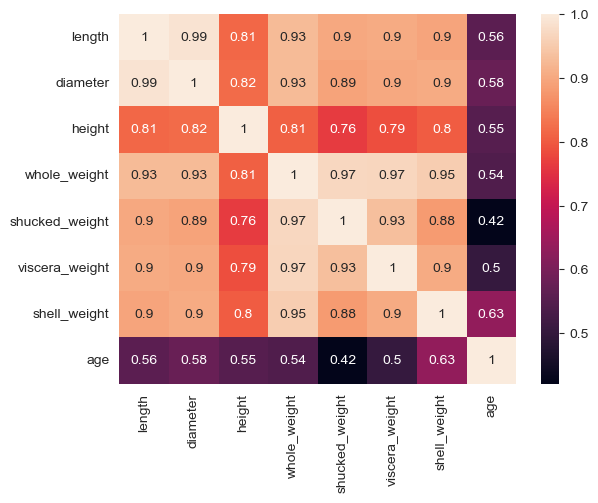

In [326]:
# correlations as heatmap

dfAbaloneCorrelations = dfAbalone.corr()
# dfAbaloneCorrelations = dfAbaloneCategorized.corr()

sns.heatmap(dfAbaloneCorrelations, annot=True)
